In [1]:
# Day 3 Exercise: Convolutional Neural Networks (CNN) with Fashion-MNIST

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (28,28,1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("After preprocessing:")
print("x_train shape:", x_train.shape)
print("y_train shape (one-hot):", y_train_cat.shape)


After preprocessing:
x_train shape: (60000, 28, 28, 1)
y_train shape (one-hot): (60000, 10)


In [4]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# MaxPooling layer
model.add(MaxPooling2D((2,2)))

# Add another Conv + Pooling for better feature extraction
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten before dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))   # Regularization to avoid overfitting
model.add(Dense(10, activation='softmax'))   # 10 classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10, batch_size=128, verbose=2)


Epoch 1/10
469/469 - 49s - 104ms/step - accuracy: 0.7779 - loss: 0.6134 - val_accuracy: 0.8533 - val_loss: 0.4084
Epoch 2/10
469/469 - 47s - 101ms/step - accuracy: 0.8591 - loss: 0.3909 - val_accuracy: 0.8726 - val_loss: 0.3437
Epoch 3/10
469/469 - 79s - 168ms/step - accuracy: 0.8758 - loss: 0.3423 - val_accuracy: 0.8808 - val_loss: 0.3249
Epoch 4/10
469/469 - 83s - 178ms/step - accuracy: 0.8870 - loss: 0.3119 - val_accuracy: 0.8882 - val_loss: 0.3051
Epoch 5/10
469/469 - 80s - 170ms/step - accuracy: 0.8954 - loss: 0.2856 - val_accuracy: 0.8962 - val_loss: 0.2872
Epoch 6/10
469/469 - 45s - 95ms/step - accuracy: 0.9017 - loss: 0.2700 - val_accuracy: 0.8968 - val_loss: 0.2744
Epoch 7/10
469/469 - 80s - 171ms/step - accuracy: 0.9088 - loss: 0.2493 - val_accuracy: 0.9004 - val_loss: 0.2721
Epoch 8/10
469/469 - 83s - 177ms/step - accuracy: 0.9122 - loss: 0.2368 - val_accuracy: 0.9014 - val_loss: 0.2636
Epoch 9/10
469/469 - 82s - 175ms/step - accuracy: 0.9174 - loss: 0.2245 - val_accuracy: 0

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9085999727249146


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


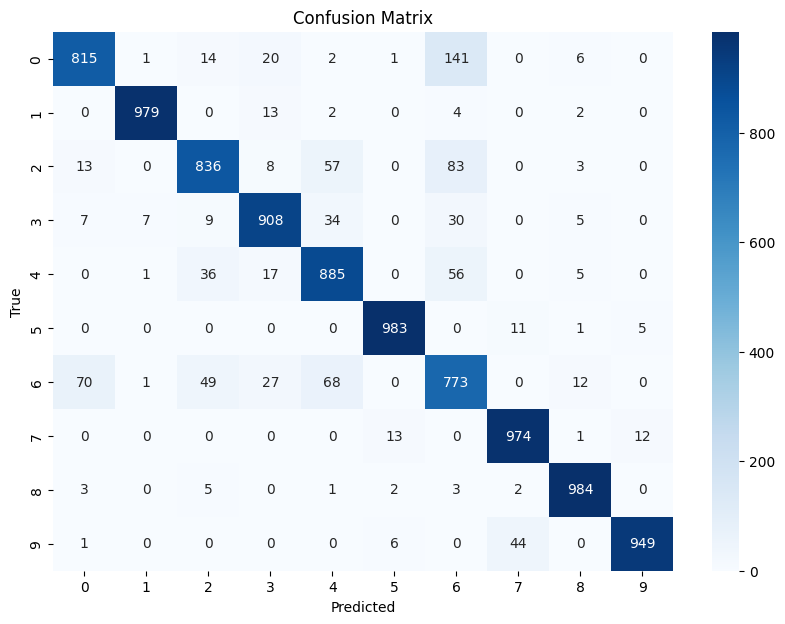

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.84      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.77      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [8]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))
